In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score 

In [2]:
df = pd.read_excel("AirPollution.xls")

In [3]:
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Unnamed: 9,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer


In [4]:
df.shape

(151, 11)

In [5]:
dellist = ["Zn" , "Site" , "Unnamed: 9" , "Season"]
for val in dellist:
    del df[val]
df.head()

,PM10,Pb,Cd,Cu,Cr,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,48.71,19.23


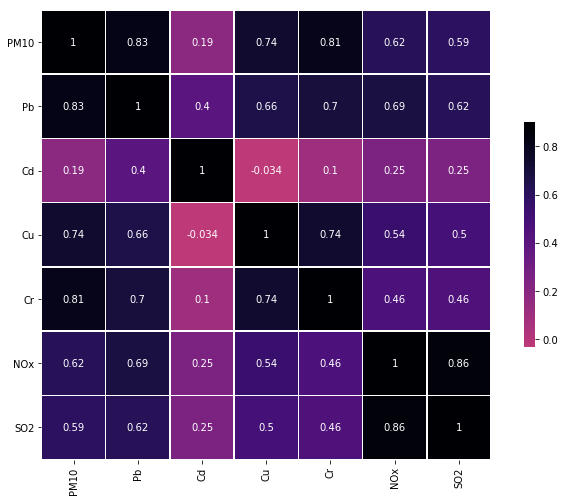

In [6]:
cormat = df.corr()
a4_dimens = (11.7 , 8.27)
fig , ax = plt.subplots(figsize = a4_dimens)
sns.heatmap(cormat, cmap="magma_r", vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} ,
            annot = True,
            xticklabels=cormat.columns.values ,
            yticklabels=cormat.columns.values,
            ax = ax)
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

In [7]:
del df["Cd"]
del df["SO2"]

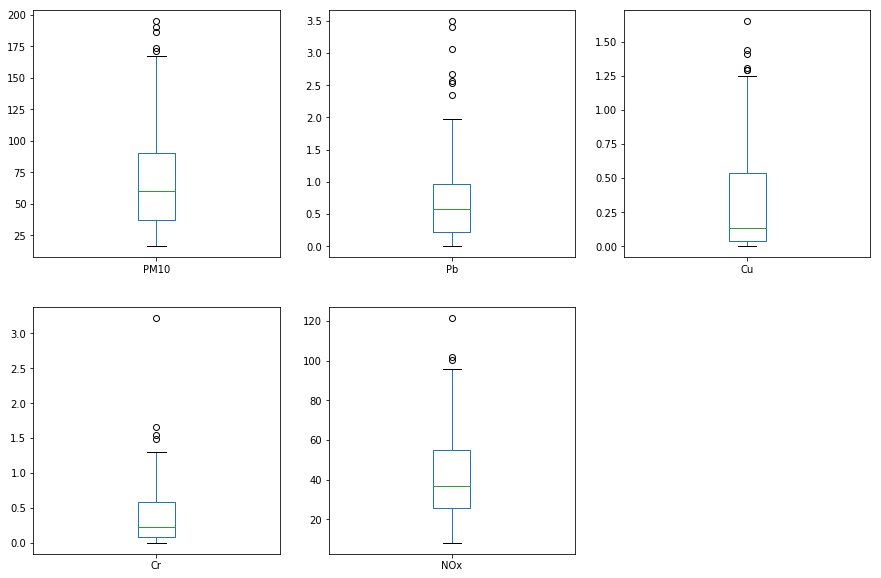

In [8]:
df.plot(kind = "box" , subplots = True , layout = (2,3) , figsize = (15 , 10))
plt.show()

In [9]:
for outlier in df.columns:
     B= plt.boxplot(df[outlier])
     value = [item.get_ydata()[1] for item in B['whiskers']]
     upper_whisker = value[1]
     df[outlier][df[outlier] > upper_whisker] = upper_whisker

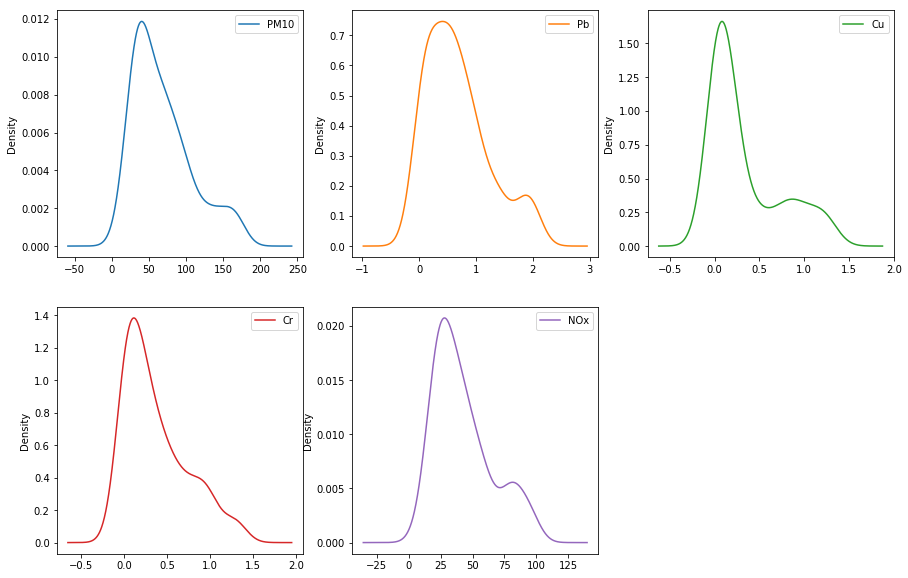

In [11]:
df.plot(kind = "density" , subplots = True , layout = (2,3) , figsize = (15 , 10) , sharex=False)
plt.show()

In [12]:
y = df.iloc[:,0:1].values
x = df.iloc[:,1:]
x0 = np.ones([x.shape[0],1])
x = np.concatenate((x0,x) , axis = 1)

In [13]:
from sklearn.model_selection import train_test_split as tt
x_train , x_test , y_train , y_test = tt(x,y,test_size = 0.30, random_state = 10)

<h3>Cost Function</h3>

In [14]:
def costFunction(x,y,theta):
    costF = ( (x @ theta.T) - y)**2
    return sum(costF)/(2*len(x))

<h3>Stochastic Gradient Descent</h3>

In [15]:
def stochastic_gradiend_descent(x , y , theta ,n_epochs , n_iters , eta0 ):
    cost = np.zeros(n_epochs)
    for epoch in  range(n_epochs):
        for i in range(n_iters):
            random_index = np.random.randint(x.shape[0])
            xi = x[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]
            t = epoch * x.shape[0] + i
            alpha = eta0/(t + x.shape[0])
            #print(alpha)
            theta = theta - (alpha)* (xi*((xi @ theta.T)-yi))
            #print(theta)
        cost[epoch] = costFunction(x,y,theta)
    return theta , cost

<h3>Linear Regression</h3>

In [16]:
def linearRegression(x ,thetas):
    pred_y =  x @ thetas.T 
    return pred_y

In [17]:
epoch = 100
iters = 6000
eta0 = 0.095

In [18]:
theta = np.zeros([1,df.shape[1]])
print(theta)

[[0. 0. 0. 0. 0.]]


In [19]:
coef , cost = stochastic_gradiend_descent(x_train , y_train ,
                                          theta , epoch,iters , eta0)

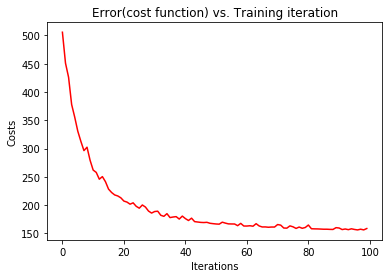

In [20]:
fig, ax = plt.subplots()
ax.plot(np.arange(epoch), cost, 'r-')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Costs')  
ax.set_title('Error(cost function) vs. Training iteration')
plt.show()

In [21]:
pred_y_sgd = linearRegression(x_test  , coef)
print("r2 = " , r2_score(y_test,pred_y_sgd))

r2 =  0.7970369837213565


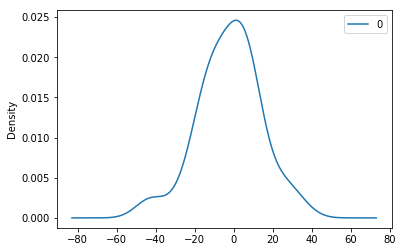

In [22]:
residuals = y_test -  pred_y_sgd
pd.DataFrame(residuals).plot(kind = "density")
plt.show()